In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
df = pd.read_csv("customer_segmentation.csv", encoding="cp1252")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [75]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

## EDA

c:\Users\Ahmed\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


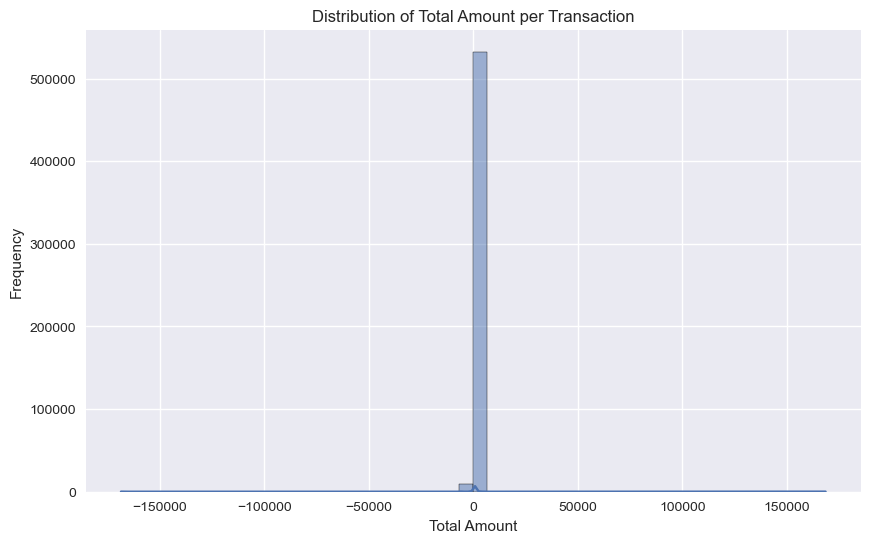

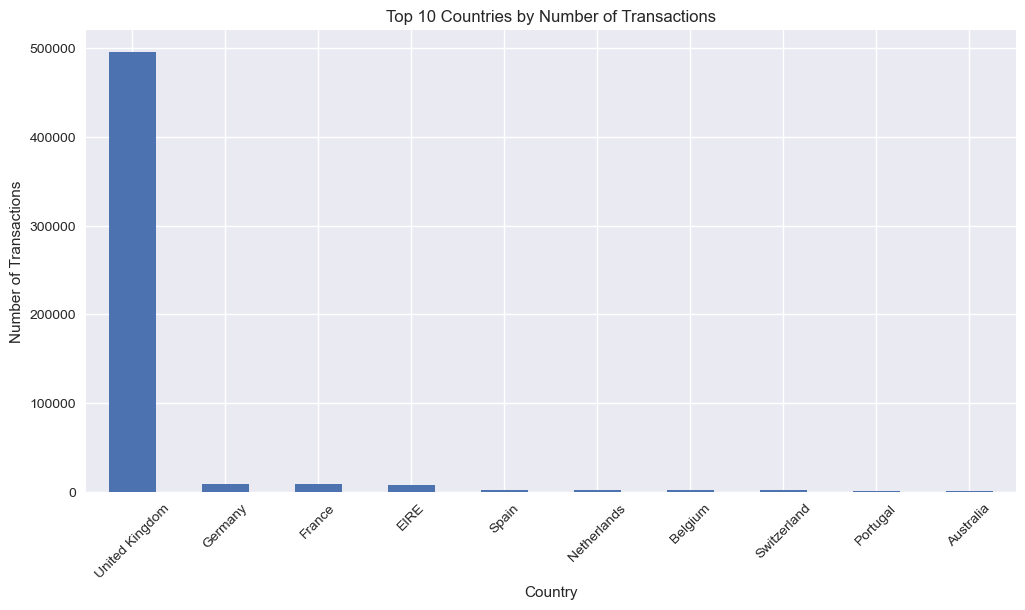

c:\Users\Ahmed\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ahmed\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


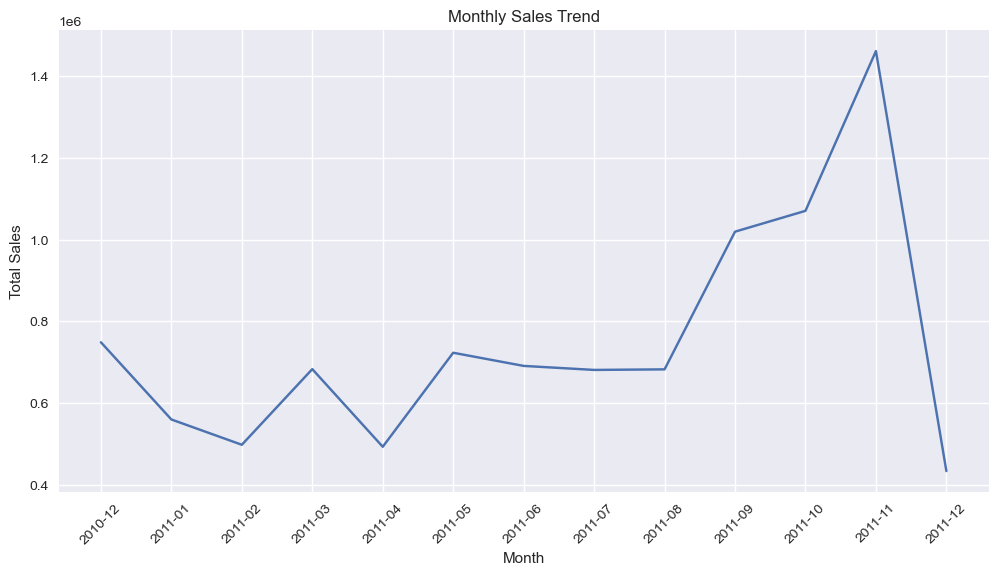

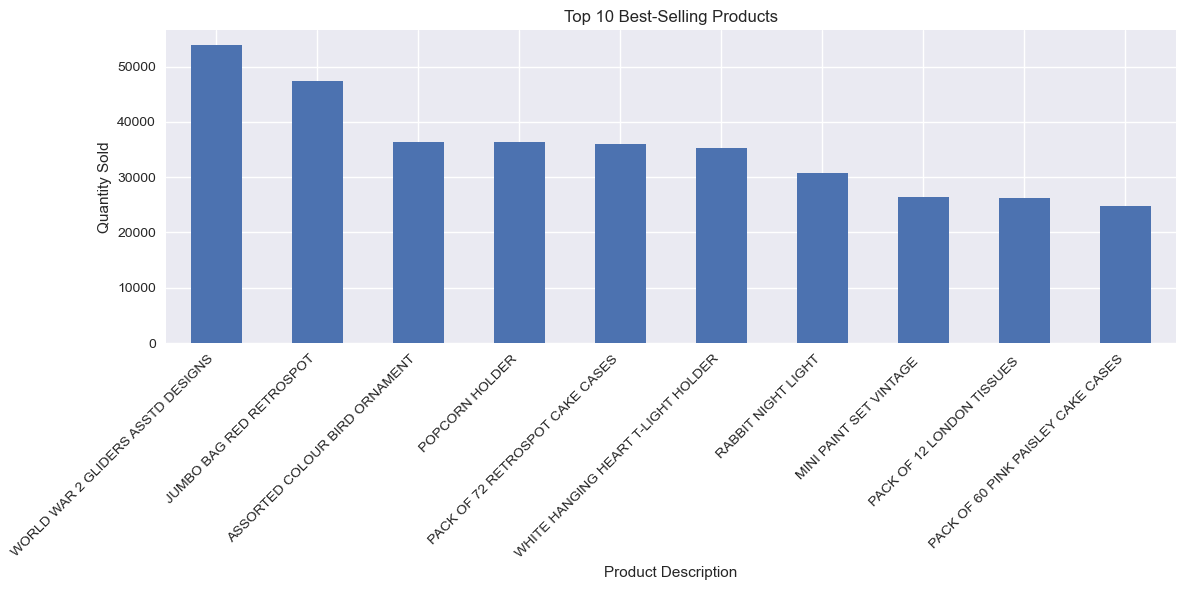

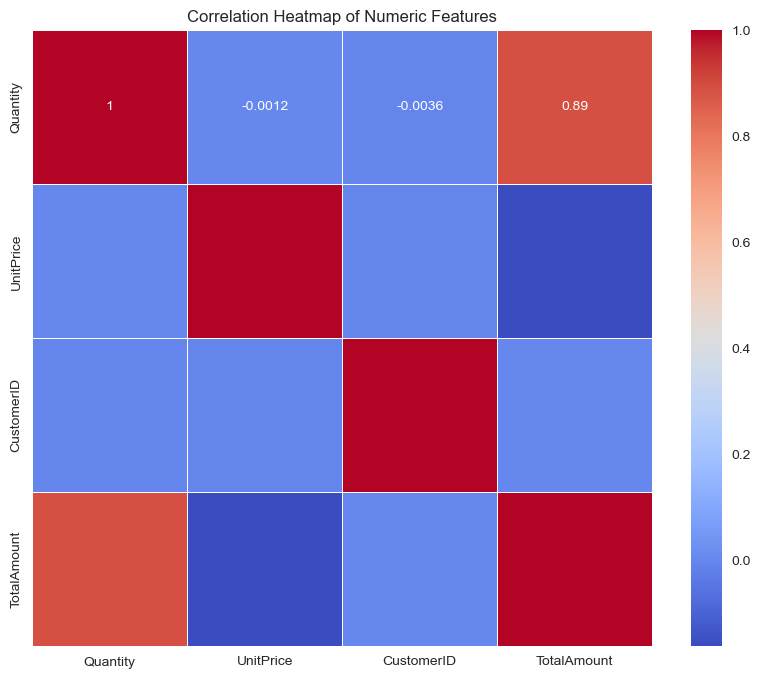

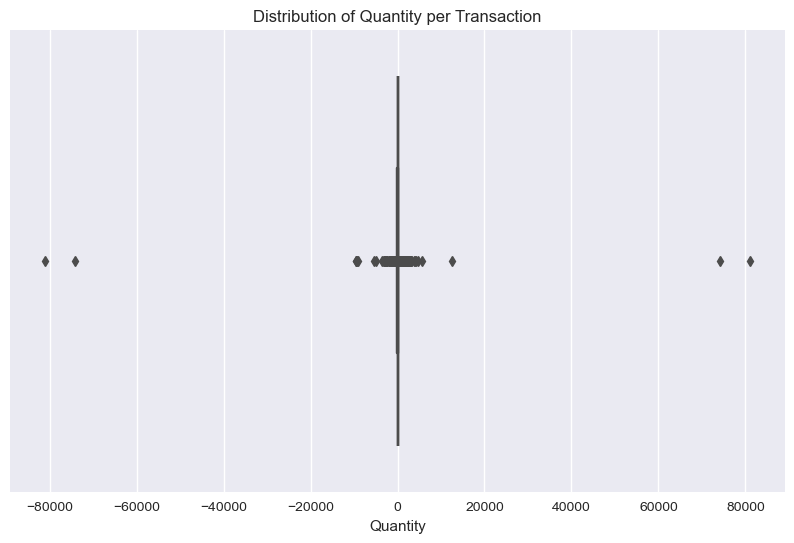

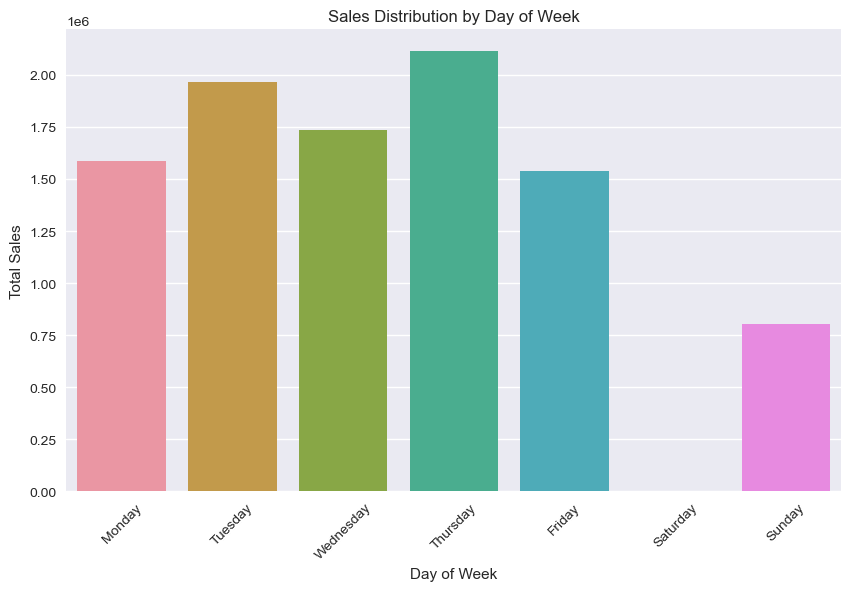

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
plt.style.use("seaborn-v0_8")

# 1. Distribution of Total Amount per Transaction
plt.figure(figsize=(10, 6))
sns.histplot(df["Quantity"] * df["UnitPrice"], bins=50, kde=True)
plt.title("Distribution of Total Amount per Transaction")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

# 2. Top 10 Countries by Number of Transactions
plt.figure(figsize=(12, 6))
df["Country"].value_counts().nlargest(10).plot(kind="bar")
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# 3. Monthly Sales Trend
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["TotalAmount"] = (
    df["Quantity"] * df["UnitPrice"]
)  # Calculate total amount per transaction
monthly_sales = df.groupby("Month")["TotalAmount"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="TotalAmount", data=monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Best-Selling Products
top_products = df.groupby("Description")["Quantity"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 6. Distribution of Quantity per Transaction
plt.figure(figsize=(10, 6))
sns.boxplot(x="Quantity", data=df)
plt.title("Distribution of Quantity per Transaction")
plt.xlabel("Quantity")
plt.show()

# 7. Sales by Day of Week
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
# European day order
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
daily_sales = df.groupby("DayOfWeek")["TotalAmount"].sum().reset_index()
daily_sales["DayName"] = daily_sales["DayOfWeek"].map(lambda x: day_order[x])
plt.figure(figsize=(10, 6))
sns.barplot(x="DayName", y="TotalAmount", data=daily_sales, order=day_order)
plt.title("Sales Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe()

In [77]:
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df.dropna(inplace=True)
df.drop(columns=["InvoiceDate"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype    
---  ------        --------------   -----    
 0   InvoiceNo     406829 non-null  object   
 1   StockCode     406829 non-null  object   
 2   Description   406829 non-null  object   
 3   Quantity      406829 non-null  int64    
 4   UnitPrice     406829 non-null  float64  
 5   CustomerID    406829 non-null  float64  
 6   Country       406829 non-null  object   
 7   Month         406829 non-null  period[M]
 8   TotalAmount   406829 non-null  float64  
 9   DayOfWeek     406829 non-null  int32    
 10  InvoiceYear   406829 non-null  int32    
 11  InvoiceMonth  406829 non-null  int32    
 12  InvoiceDay    406829 non-null  int32    
dtypes: float64(3), int32(4), int64(1), object(4), period[M](1)
memory usage: 37.2+ MB


In [78]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
CustomerID      0
Country         0
Month           0
TotalAmount     0
DayOfWeek       0
InvoiceYear     0
InvoiceMonth    0
InvoiceDay      0
dtype: int64

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month,TotalAmount,DayOfWeek,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,15.30,2,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,20.34,2,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,22.00,2,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,20.34,2,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,20.34,2,2010,12,1


In [80]:
print(df["Description"].value_counts().head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: count, dtype: int64


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


# 1. Feature Engineering
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

customer_features = (
    df.groupby("CustomerID")
    .agg(
        {
            "InvoiceNo": "count",
            "TotalAmount": "sum",
            "Quantity": "sum",
            "InvoiceYear": "max",
            "InvoiceMonth": "max",
            "InvoiceDay": "max",
        }
    )
    .reset_index()
)

customer_features.columns = [
    "CustomerID",
    "TransactionCount",
    "TotalSpent",
    "TotalQuantity",
    "LastPurchaseYear",
    "LastPurchaseMonth",
    "LastPurchaseDay",
]

# Calculate recency using the maximum values in the dataset
max_year = customer_features["LastPurchaseYear"].max()
max_month = customer_features["LastPurchaseMonth"].max()
max_day = customer_features["LastPurchaseDay"].max()

customer_features["Recency"] = (
    (max_year - customer_features["LastPurchaseYear"]) * 365
    + (max_month - customer_features["LastPurchaseMonth"]) * 30
    + (max_day - customer_features["LastPurchaseDay"])
)

# Calculate tenure using first & last purchase dates
min_year = customer_features["LastPurchaseYear"].min()
min_month = customer_features["LastPurchaseMonth"].min()
min_day = customer_features["LastPurchaseDay"].min()
customer_features["Tenure"] = (
    max_year - min_year + max_month - min_month + max_day - min_day
)

# Average spending per transaction
customer_features["AvgPurchaseValue"] = (
    customer_features["TotalSpent"] / customer_features["TransactionCount"]
)

# 2. Prepare features for ML
features = [
    "TransactionCount",
    "TotalQuantity",
    "Recency",
    "Tenure",
    "AvgPurchaseValue",
]
X = customer_features[features]
y = customer_features["TotalSpent"]  # Using TotalSpent as an indicator of CLV
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27
)

# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define models and their parameter grids
models = {
    "Random Forest": (
        RandomForestRegressor(random_state=27),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "XGBoost": (
        xgb.XGBRegressor(random_state=27),
        {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.3],
        },
    ),
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=27),
        {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.3],
        },
    ),
    "Linear Regression": (LinearRegression(), {}),
    "Ridge Regression": (Ridge(), {"alpha": [0.01, 0.1, 1, 10, 100]}),
    "Lasso Regression": (Lasso(), {"alpha": [0.01, 0.1, 1, 10, 100]}),
    "ElasticNet Regression": (
        ElasticNet(),
        {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.5, 0.9]},
    ),
}

# 6. Train and evaluate models
results = {}

for name, (model, param_grid) in models.items():
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "model": best_model,
        "mse": mse,
        "r2": r2,
        "best_params": grid_search.best_params_,
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

# 7. Select the best model
best_model_name = min(results, key=lambda x: results[x]["mse"])
best_model = results[best_model_name]["model"]

print(f"\nBest Model: {best_model_name}")
print(f"Best Model MSE: {results[best_model_name]['mse']}")
print(f"Best Model R-squared: {results[best_model_name]['r2']}")

# 8. Feature importance for the best model
if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.DataFrame(
        {"feature": features, "importance": best_model.feature_importances_}
    )
    feature_importance = feature_importance.sort_values("importance", ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)

# 9. Predict CLV for all customers using the best model
X_all_scaled = scaler.transform(X)
customer_features["PredictedCLV"] = best_model.predict(X_all_scaled)

# Display top 10 customers by predicted CLV
print("\nTop 10 Customers by Predicted CLV:")
print(customer_features.nlargest(10, "PredictedCLV")[["CustomerID", "PredictedCLV"]])


Training Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 27068860.18526819
R-squared Score: 0.6833680301170351

Training XGBoost...
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 22923054.40789403
R-squared Score: 0.7318626708613309

Training Gradient Boosting...
Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error: 19502819.64935512
R-squared Score: 0.7718701060339336

Training Linear Regression...
Best parameters: {}
Mean Squared Error: 30995604.01388927
R-squared Score: 0.6374358177825558

Training Ridge Regression...
Best parameters: {'alpha': 0.01}
Mean Squared Error: 30995707.13166737
R-squared Score: 0.6374346115852876

Training Lasso Regression...
Best parameters: {'alpha': 0.01}
Mean Squared Error: 30995655.74613075
R-squared Score: 0.6374352126561702

Training ElasticNet Regression...
Best parameters: {'alpha': 0.0

## Model Deployment

In [82]:
import joblib

# Save the best model
joblib.dump(best_model, "best_clv_model.joblib")

# Save the scaler
joblib.dump(scaler, "clv_scaler.joblib")

['clv_scaler.joblib']